In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import BoundaryNorm

norm = BoundaryNorm(boundaries = np.linspace(0, 30, 21), ncolors = 256)
cmap = plt.cm.get_cmap('Spectral')

/tmp/ipykernel_1720045/3002173644.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Spectral')


In [6]:
layer = 3

#
hr = xr.open_dataset('/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/20250210_conus_ICB20TRCNPRDCTCBC_3yearerw/run/20250210_conus_ICB20TRCNPRDCTCBC_3yearerw.elm.h1.1903-01-01-00000.nc')
bd_col = hr['bd_col'][0, layer, :].copy()
hr.close()

#
hr = xr.open_dataset('/gpfs/wolf2/cades/cli185/proj-shared/ywo/E3SM/output/20250210_conus_ICB20TRCNPRDCTCBC_3yearerw/run/surfdata.nc')

# Interpolated from random forest
cec0 = hr['CEC_TOT'][layer, :].copy()

## One equation: CEC = -6.97 + 1.25 pH + 0.41 C (g kg-1)
##cec = -6.97 + 1.25 * hr['SOIL_PH'][layer, :].values + 0.41 * \
##    hr['ORGANIC'][layer, :].values * 0.58 / bd_col * 1000
# One equation: CEC SOM (cmolc kg-1 C) = 194 + 34 pH
#cec = (194 + 34 * hr['SOIL_PH'][layer, :].values) * hr['ORGANIC'][layer, :].values * 0.58 / bd_col.values / cec0
cec = cec0 + 34 * (3 - hr['SOIL_PH'][layer, :].values) * hr['ORGANIC'][layer, :].values * 0.58 / bd_col.values


# Alternative equation: check where negative
cec2_base = cec0 + 51 * (3 - hr['SOIL_PH'][layer, :].values) * hr['ORGANIC'][layer, :].values * 0.58 / bd_col.values

hr.close()

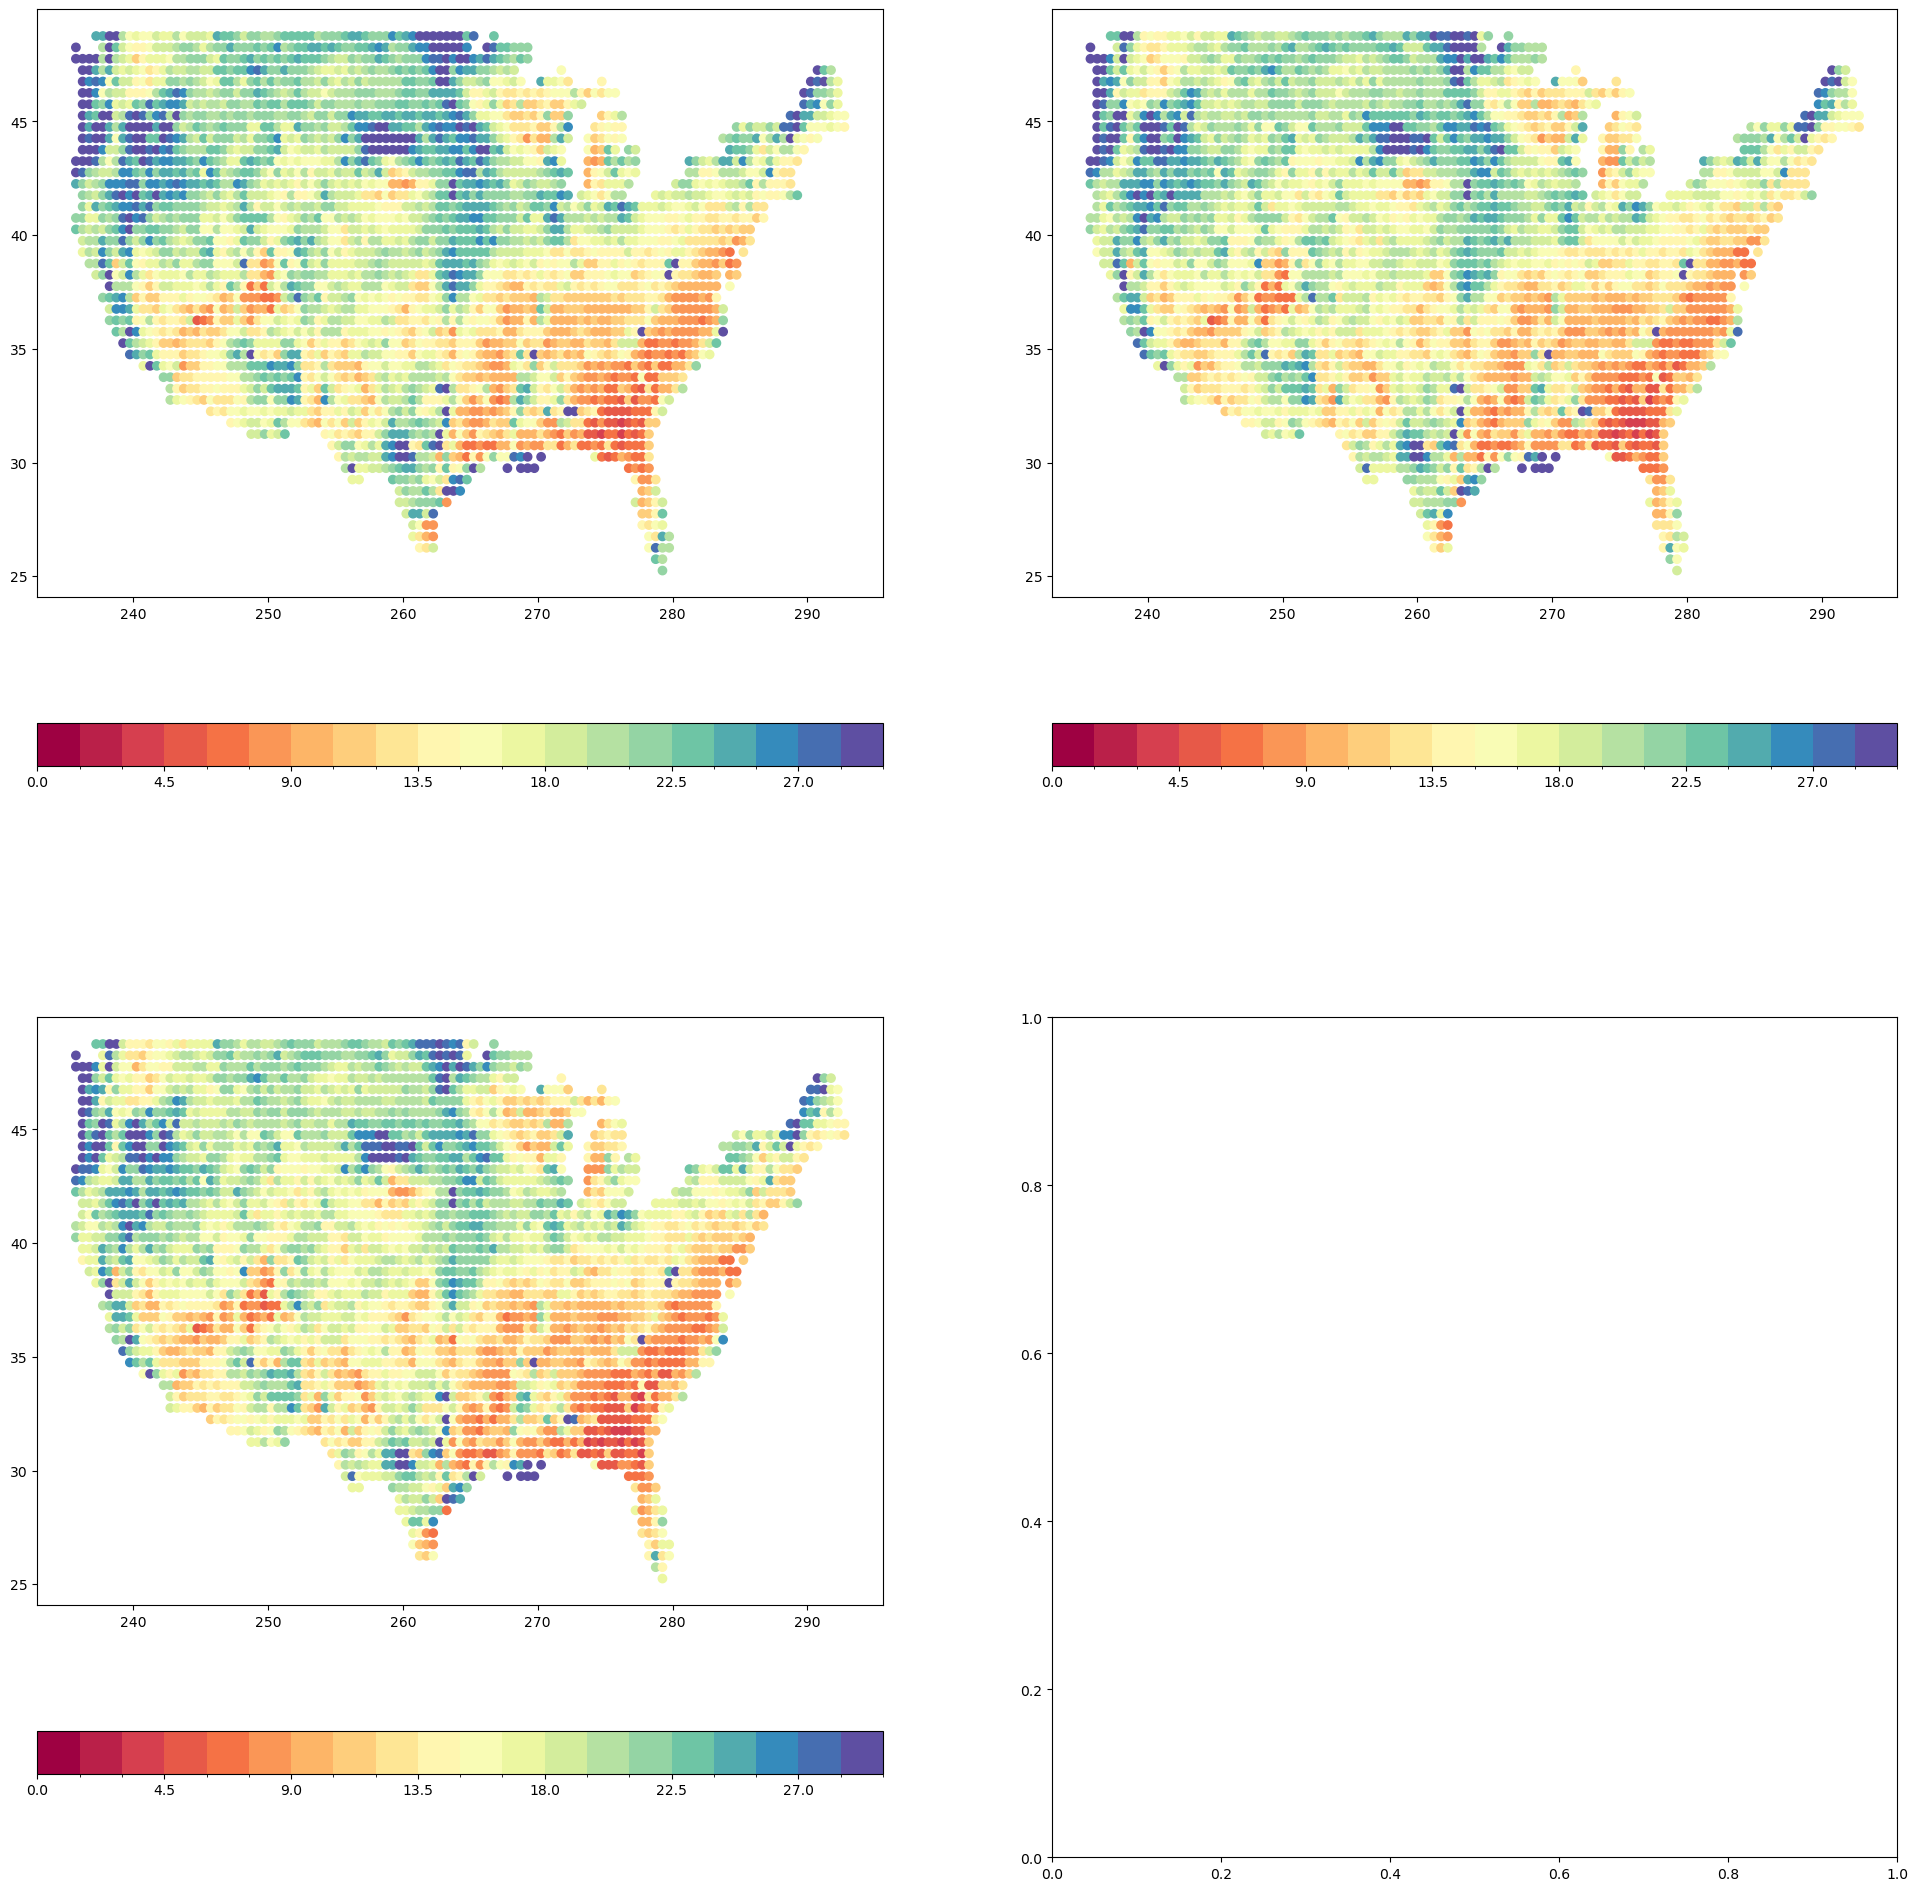

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (24, 24))
ax = axes.flat[0]
cf = ax.scatter(hr['LONGXY'], hr['LATIXY'], c = cec0, norm = norm, cmap = cmap)
plt.colorbar(cf, ax = ax, orientation = 'horizontal')
ax = axes.flat[1]
cf = ax.scatter(hr['LONGXY'], hr['LATIXY'], c = cec, norm = norm, cmap = cmap)
plt.colorbar(cf, ax = ax, orientation = 'horizontal')
ax = axes.flat[2]
cf = ax.scatter(hr['LONGXY'], hr['LATIXY'], c = cec2_base, norm = norm, cmap = cmap)
plt.colorbar(cf, ax = ax, orientation = 'horizontal')

In [8]:
hr.close()